This script can be used to perform data augmentation. The images can be turned 90, 180 or 270 degrees and the images can be mirrored around a central vertical or horizontal axis. The same operations have to be applied to the annotation files.

Numpy arrays of images and annotation files can be taken as an input and new numpy arrays of rotated or mirrored images and annotation files will be given as an output

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def Rotating(im_array):
    '''rotating an image represented by a numpy array over 90°, 180° and 270°'''
    
    im_90 = np.rot90(im_array)
    im_180 = np.rot90(im_90)
    im_270 = np.rot90(im_180)
    
    return im_90,im_180,im_270

In [3]:
def Flipping(im_array):
    '''Mirroring an image represented by a numpy array, along a horizontal and vertical axis'''
    
    im_flipped_0 = np.flip(im_array, axis = 0)
    im_flipped_1 = np.flip(im_array, axis = 1)
    
    return im_flipped_0, im_flipped_1

In [4]:
def DataAugmentation(im_arrays):
    '''
    This function takes an array of images (or annotation files) as an input and performs
    data augmentation for all images (or annotation files) in these two arrays, 
    the images are rotated and flipped
    '''
    
    # go over all images in the arrays
    for im_number in range(im_arrays.shape[0]):
        im_array = im_arrays[im_number]
        
        # rotating the image
        im_90,im_180,im_270 = Rotating(im_array)
        im_90 = np.expand_dims(im_90, axis = 0)
        im_180 = np.expand_dims(im_180, axis = 0)
        im_270 = np.expand_dims(im_270, axis = 0)
        
        # flipping the image
        im_flipped_0, im_flipped_1 = Flipping(im_array)
        im_flipped_0 = np.expand_dims(im_flipped_0, axis = 0)
        im_flipped_1 = np.expand_dims(im_flipped_1, axis = 0)
        
        # storing all augmented images again in arrays
        if im_number == 0:
            im_arrays_90 = im_90
            im_arrays_180 = im_180
            im_arrays_270 = im_270
            im_arrays_flipped_0 = im_flipped_0
            im_arrays_flipped_1 = im_flipped_1
            
        else:
            im_arrays_90 = np.vstack((im_arrays_90, im_90))
            im_arrays_180 = np.vstack((im_arrays_180, im_180))
            im_arrays_270 = np.vstack((im_arrays_270, im_270))
            im_arrays_flipped_0 = np.vstack((im_arrays_flipped_0, im_flipped_0))
            im_arrays_flipped_1 = np.vstack((im_arrays_flipped_1, im_flipped_1))
            
    return im_arrays_90, im_arrays_180, im_arrays_270, im_arrays_flipped_0, im_arrays_flipped_1

In [5]:
def DataAugmentationDataBase(database, annotations = False):
    '''
    This function takes as an input the database for which augmentation should be applied
    It reads in all arrays with images (and annotations), applies data augmentation and 
    stores the augmented data again as numpy arrays
    '''
    
    # define the path where the arrays are stored for the particular database
    array_path = 'C:/Users/lunam/Documents/1steMaster/Stage/Data' + '/' + database + '/' + 'Arrays/'
    print('Data augmentation for: {}'.format(array_path))
    
    # reading in the image arrays
    train_im_array = np.load(array_path + 'train_images.npy')
    test_im_array = np.load(array_path + 'test_images.npy')
    
    # data augmentation for the train and test images
    print('Augmenting the image data...')
    train_90, train_180, train_270, train_flip_0, train_flip_1 = DataAugmentation(train_im_array)
    test_90, test_180, test_270, test_flip_0, test_flip_1 = DataAugmentation(test_im_array)
        
    # store all augmented arrays
    print('Storing the augmented train image arrays...')
    np.save(array_path+ 'train_images_90', train_90)
    np.save(array_path+ 'train_images_180', train_180)
    np.save(array_path+ 'train_images_270', train_270)
    np.save(array_path+ 'train_images_flip0', train_flip_0)
    np.save(array_path+ 'train_images_flip1', train_flip_1)
    
    np.save(array_path+ 'test_images_90', test_90)
    np.save(array_path+ 'test_images_180', test_180)
    np.save(array_path+ 'test_images_270', test_270)
    np.save(array_path+ 'test_images_flip0', test_flip_0)
    np.save(array_path+ 'test_images_flip1', test_flip_1)
    
    print('Done')
    
    # if there are annotations, they also have to be augmented
    if annotations:
        
        # reading in the annotation files
        train_annot_array = np.load(array_path + 'train_annotations.npy')
        test_annot_array = np.load(array_path + 'test_annotations.npy')
        
        # data augmentation for the train and test annotations
        print('Augmenting the annotation data...')
        train_90, train_180, train_270, train_flip_0, train_flip_1 = DataAugmentation(train_annot_array)
        test_90, test_180, test_270, test_flip_0, test_flip_1 = DataAugmentation(test_annot_array)
        
        # store all arrays
        print('Storing the augmented train annotation arrays...')
        np.save(array_path+ 'train_annotations_90', train_90)
        np.save(array_path+ 'train_annotations_180', train_180)
        np.save(array_path+ 'train_annotations_270', train_270)
        np.save(array_path+ 'train_annotations_flip0', train_flip_0)
        np.save(array_path+ 'train_annotations_flip1', train_flip_1)

        np.save(array_path+ 'test_annotations_90', test_90)
        np.save(array_path+ 'test_annotations_180', test_180)
        np.save(array_path+ 'test_annotations_270', test_270)
        np.save(array_path+ 'test_annotations_flip0', test_flip_0)
        np.save(array_path+ 'test_annotations_flip1', test_flip_1)
        
        print('Done')

In [12]:
# perform data augmentation for a particular database
# DataAugmentationDataBase('CHASEDB1', annotations = True)
# DataAugmentationDataBase('DRIVE', annotations = True)
# DataAugmentationDataBase('STARE', annotations = True)
# DataAugmentationDataBase('IDRiD/HardExudates', annotations = True)
# DataAugmentationDataBase('IDRiD/SoftExudates', annotations = True)
# DataAugmentationDataBase('IDRiD/Hemorrhages', annotations = True)
# DataAugmentationDataBase('IDRiD/Microaneurysms', annotations = True)

Data augmentation for: C:/Users/lunam/Documents/1steMaster/Stage/Data/IDRiD/Microaneurysms/Arrays/
Augmenting the image data...
Storing the augmented train image arrays...
Done
Augmenting the annotation data...
Storing the augmented train annotation arrays...
Done


Below some testing is performed on the augmented data arrays.

In [52]:
def PlotImage(image_array, database = '', image_name = '', save = False, savepath = ''):
    '''Visualize (and save if desired) an image represented by a numpy array'''
    
    plt.figure()
    plt.title(database+': '+image_name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(image_array, cmap=plt.cm.Greys_r)
    
    if save == True:
        plt.savefig(savepath+database+'_'+image_name+'.png')
    
    return 

Shape train images: (20, 512, 512)
Shape train annotations: (20, 512, 512)
Shape train image: (512, 512)
Shape train annotation: (512, 512)
Shape rotated train image: (512, 512)
Shape rotated train annotation: (512, 512)


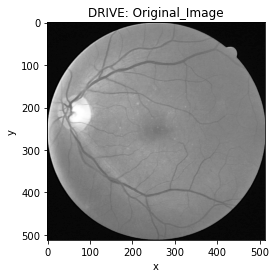

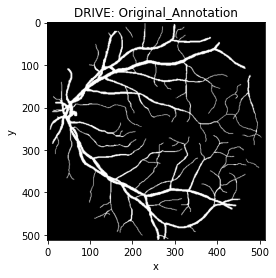

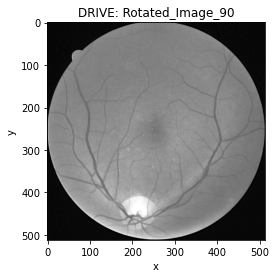

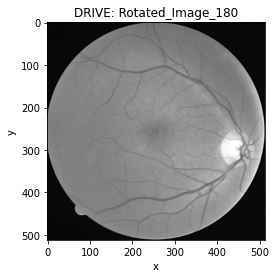

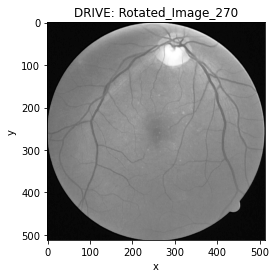

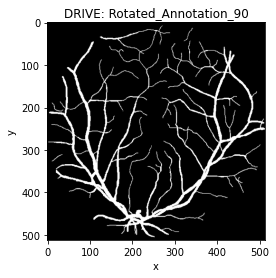

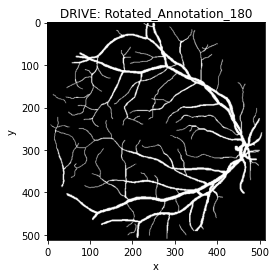

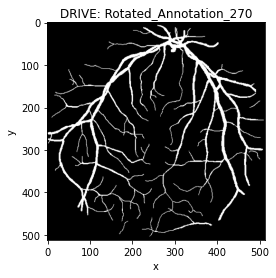

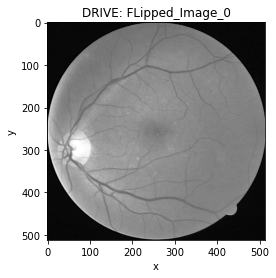

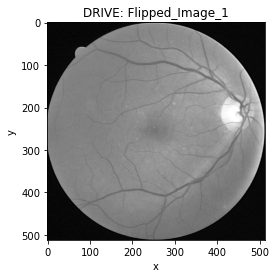

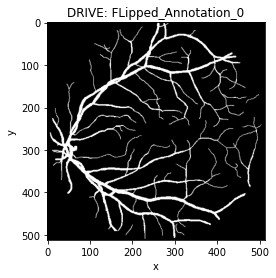

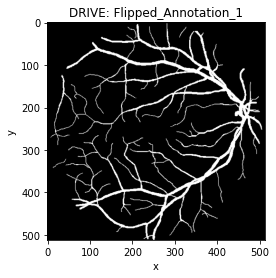

In [45]:
# some testing of the functions for a particular image
datapath = 'C:/Users/lunam/Documents/1steMaster/Stage/Data/DRIVE/Arrays/'
train_images = np.load(datapath+'train_images.npy')
train_annotations = np.load(datapath+ 'train_annotations.npy')
print('Shape train images: {}'.format(train_images.shape))
print('Shape train annotations: {}'.format(train_annotations.shape))

im_array = train_images[0,:,:]
annot_array = train_annotations[0,:,:]

print('Shape train image: {}'.format(im_array.shape))
print('Shape train annotation: {}'.format(annot_array.shape))

# plot the original image and annotation
save_dir = 'C:/Users/lunam/Documents/1steMaster/Stage/Images_Report/Data_augmentation/'
PlotImage(im_array, 'DRIVE', 'Original_Image', save = True, savepath = save_dir)
PlotImage(annot_array, 'DRIVE', 'Original_Annotation', save = True, savepath = save_dir)

# rotate the image and annotation
im_90,im_180,im_270 = Rotating(im_array)
an_90,an_180,an_270 = Rotating(annot_array)

print('Shape rotated train image: {}'.format(im_90.shape))
print('Shape rotated train annotation: {}'.format(an_90.shape))

PlotImage(im_90, 'DRIVE', 'Rotated_Image_90', save = True, savepath = save_dir)
PlotImage(im_180, 'DRIVE', 'Rotated_Image_180', save = True, savepath = save_dir)
PlotImage(im_270, 'DRIVE', 'Rotated_Image_270', save = True, savepath = save_dir)

PlotImage(an_90, 'DRIVE', 'Rotated_Annotation_90', save = True, savepath = save_dir)
PlotImage(an_180, 'DRIVE', 'Rotated_Annotation_180', save = True, savepath = save_dir)
PlotImage(an_270, 'DRIVE', 'Rotated_Annotation_270', save = True, savepath = save_dir)


# mirror the image and annotation
im_flipped_0, im_flipped_1 = Flipping(im_array)
an_flipped_0, an_flipped_1 = Flipping(annot_array)

PlotImage(im_flipped_0, 'DRIVE', 'FLipped_Image_0', save = True, savepath = save_dir)
PlotImage(im_flipped_1, 'DRIVE', 'Flipped_Image_1', save = True, savepath = save_dir)

PlotImage(an_flipped_0, 'DRIVE', 'FLipped_Annotation_0', save = True, savepath = save_dir)
PlotImage(an_flipped_1, 'DRIVE', 'Flipped_Annotation_1', save = True, savepath = save_dir)

Shape train images: (26, 512, 512, 3)
Shape train annotations: (26, 512, 512)
Shape train image: (512, 512, 3)
Shape train annotation: (512, 512)
Shape rotated train image: (512, 512, 3)
Shape rotated train annotation: (512, 512)


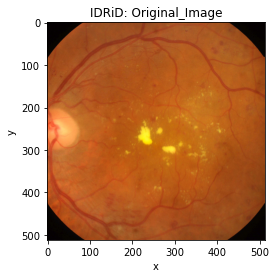

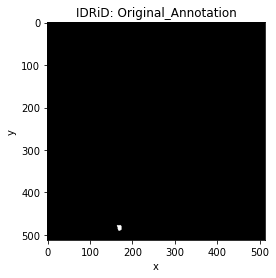

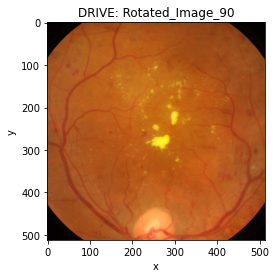

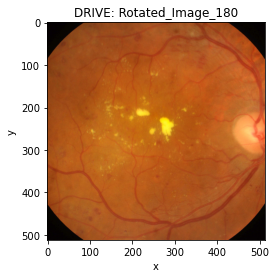

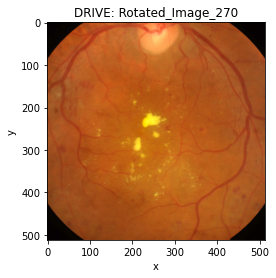

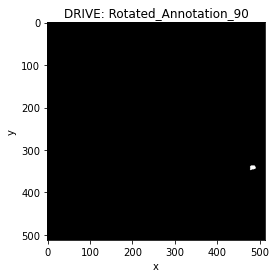

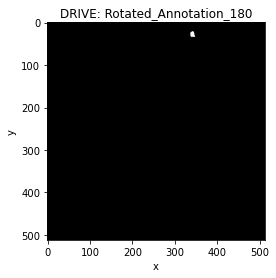

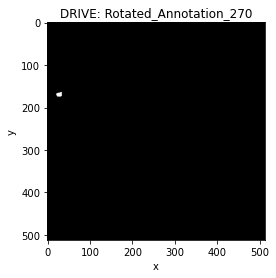

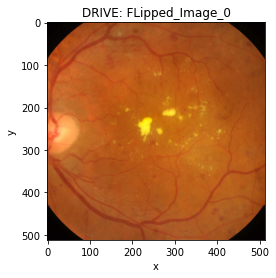

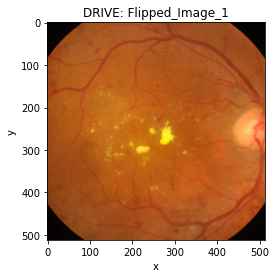

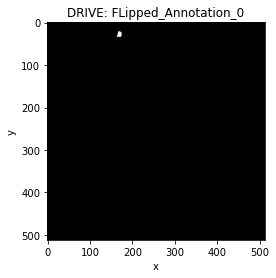

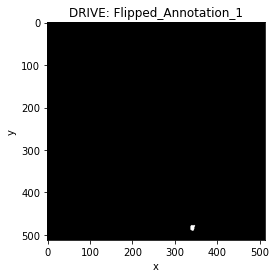

In [43]:
# some testing of the functions for a particular image
datapath = 'C:/Users/lunam/Documents/1steMaster/Stage/Data/IDRiD/SoftExudates/Arrays/'
train_images = np.load(datapath+'train_images.npy')
train_annotations = np.load(datapath+ 'train_annotations.npy')
print('Shape train images: {}'.format(train_images.shape))
print('Shape train annotations: {}'.format(train_annotations.shape))

im_array = train_images[0,:,:,:]
annot_array = train_annotations[0,:,:]

print('Shape train image: {}'.format(im_array.shape))
print('Shape train annotation: {}'.format(annot_array.shape))

# plot the original image and annotation
PlotImage(im_array, 'IDRiD', 'Original_Image')
PlotImage(annot_array, 'IDRiD', 'Original_Annotation')

# rotate the image and annotation
im_90,im_180,im_270 = Rotating(im_array)
an_90,an_180,an_270 = Rotating(annot_array)

print('Shape rotated train image: {}'.format(im_90.shape))
print('Shape rotated train annotation: {}'.format(an_90.shape))

PlotImage(im_90, 'DRIVE', 'Rotated_Image_90')
PlotImage(im_180, 'DRIVE', 'Rotated_Image_180')
PlotImage(im_270, 'DRIVE', 'Rotated_Image_270')

PlotImage(an_90, 'DRIVE', 'Rotated_Annotation_90')
PlotImage(an_180, 'DRIVE', 'Rotated_Annotation_180')
PlotImage(an_270, 'DRIVE', 'Rotated_Annotation_270')


# mirror the image and annotation
im_flipped_0, im_flipped_1 = Flipping(im_array)
an_flipped_0, an_flipped_1 = Flipping(annot_array)

PlotImage(im_flipped_0, 'DRIVE', 'FLipped_Image_0')
PlotImage(im_flipped_1, 'DRIVE', 'Flipped_Image_1')

PlotImage(an_flipped_0, 'DRIVE', 'FLipped_Annotation_0')
PlotImage(an_flipped_1, 'DRIVE', 'Flipped_Annotation_1')